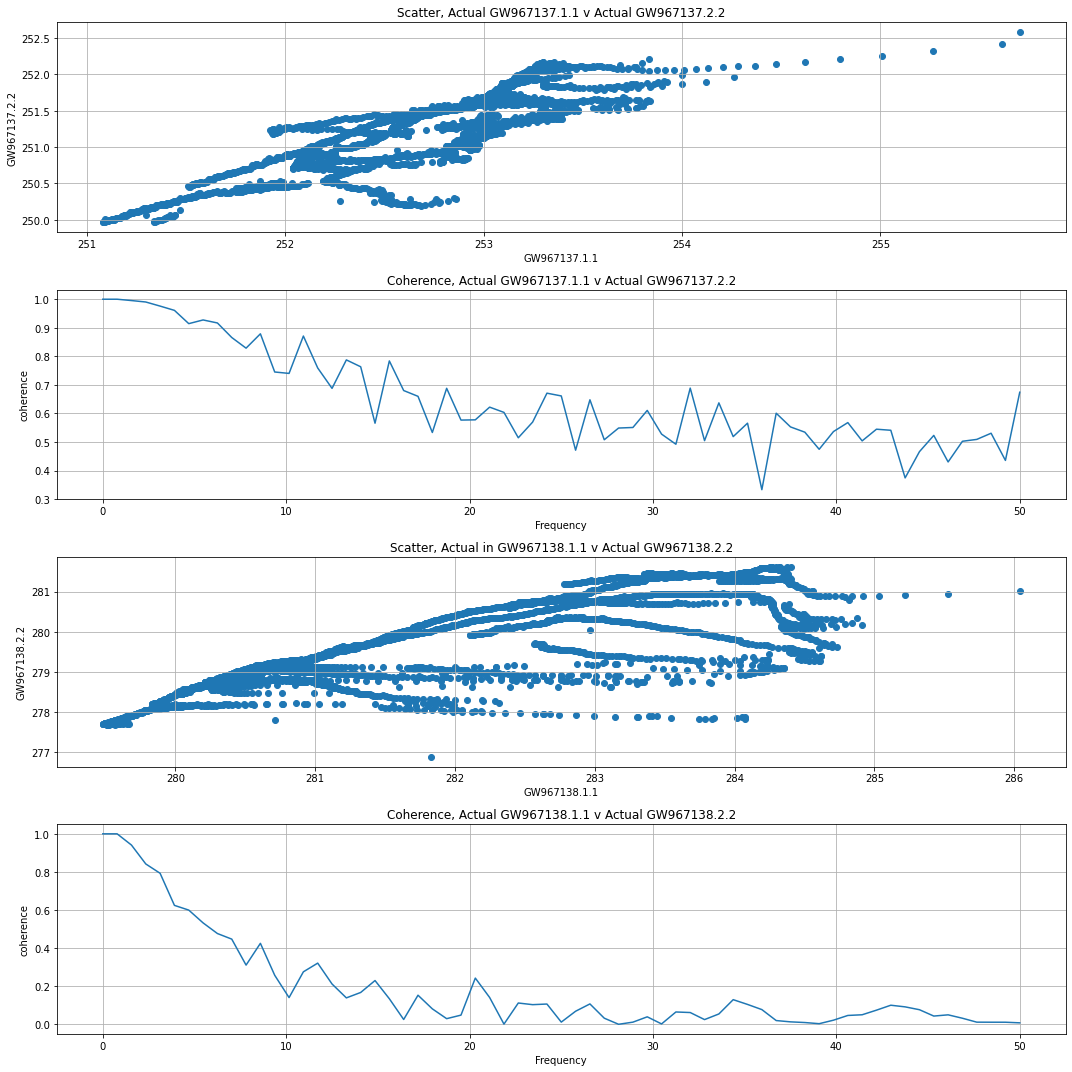

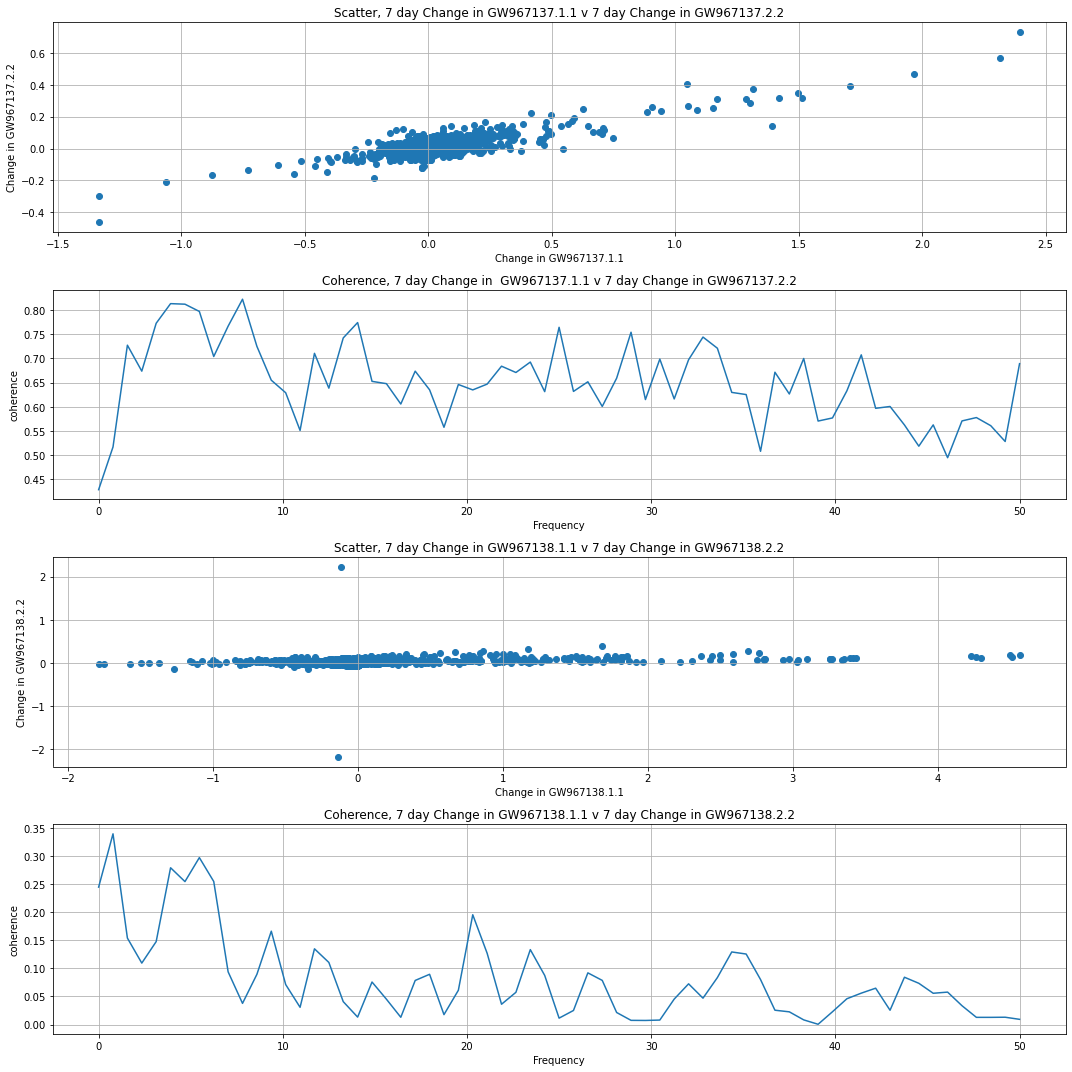

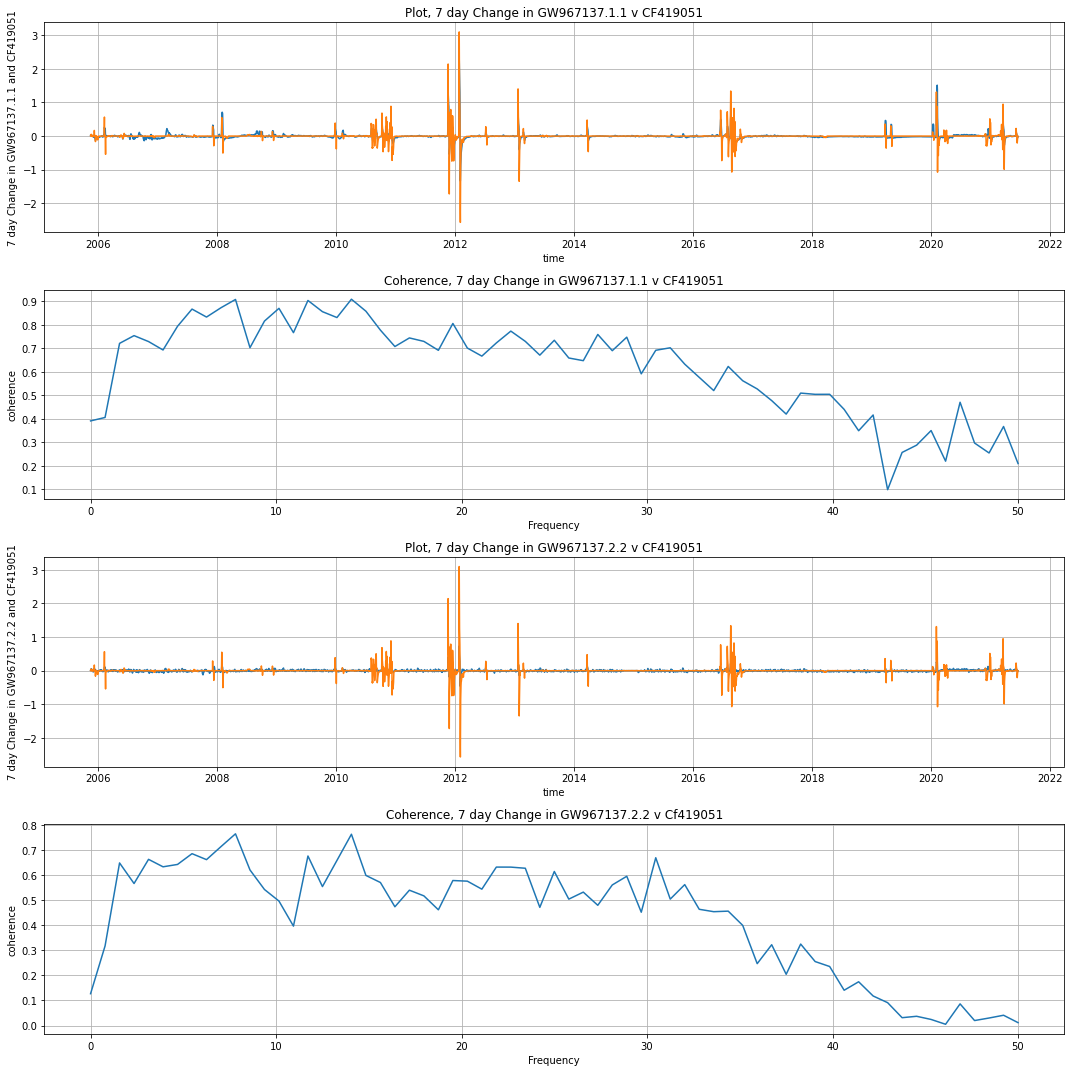

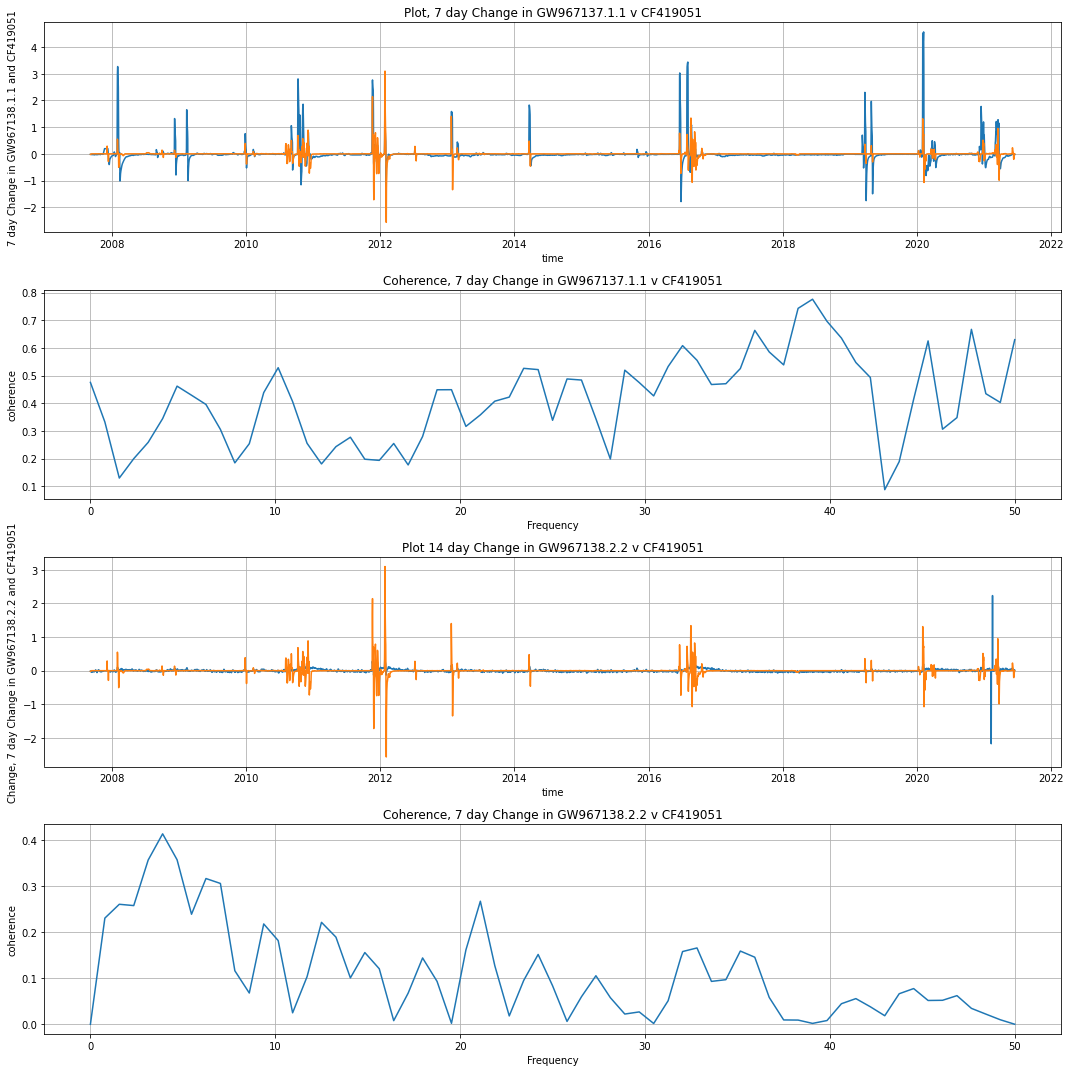

In [1]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




def mysqlconnect(): 
    # To connect MySQL database 

    
    connection = pymysql.connect(
        # host='192.168.208.1',
        host='192.168.11.6',
        user='root', 
        password='water',
        database='waterdata',
        port=30000)
    
    
    dt = 0.01
    
    try:
        with connection.cursor() as cursor:
                   
            sql1 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                        
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
            
            sql2 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                            
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                        
                        WHERE  
                            `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0
                        ''')
            
            
            
            sql3 = ('''  SELECT 
                            `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                            `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                            `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                            `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                        FROM   
                            `groundwater` AS `A`  
                        INNER JOIN
                            `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                        INNER JOIN
                            `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )
                        WHERE  
                            `A`.`meter_no` = "GW967137.1.1"
                        ''')
            
       
        
        df1_orig = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)  ## , index_col="A.read_date"
        df2_orig = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
        
        #filter out incomplete rows from the groundwater series start date
        
        df1 = df1_orig[df1_orig['read_date'] >= '2005-11-17']
        df2 = df2_orig[df2_orig['read_date'] >= '2007-09-06']
        
        #calculate the bore level change for 1 day, 1 week and 1 month
        
        # setup date deltas
        
        day_0 = (df1['read_date'])
        
        day_1 = (day_0) - pd.DateOffset(days=1)
        day_7 = (day_0) - pd.DateOffset(days=7)
        day_14 = (day_0) - pd.DateOffset(days=14)
        day_30 = (day_0) - pd.DateOffset(days=30)
        
        
        #Elfin
        
        # correct data types
        
        df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'] )
        df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
        df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])
        
        #calculate change in bore levels for each date delta
        
        # GW967137.1.1
                                        
        E_bl_ahd1_dt1 = df1['bl_ahd1'].shift(-1) - df1['bl_ahd1']
        E_bl_ahd1_dt7 = df1['bl_ahd1'].shift(-7) - df1['bl_ahd1']
        E_bl_ahd1_dt14 = df1['bl_ahd1'].shift(-14) - df1['bl_ahd1']
        E_bl_ahd1_dt30 = df1['bl_ahd1'].shift(-30) - df1['bl_ahd1']
        
        
        # GW967137.2.2
        
        E_bl_ahd2_dt1 = df1['bl_ahd2'].shift(-1) - df1['bl_ahd2']
        E_bl_ahd2_dt7 = df1['bl_ahd2'].shift(-7) - df1['bl_ahd2']
        E_bl_ahd2_dt14 = df1['bl_ahd2'].shift(-14) - df1['bl_ahd2']
        E_bl_ahd2_dt30 = df1['bl_ahd2'].shift(-30) - df1['bl_ahd2']
        
        
        # 419051 - surface water
        
        E_sl_read1_dt1 = df1['sl_read1'].shift(-1) - df1['sl_read1']
        E_sl_read1_dt7 = df1['sl_read1'].shift(-7) - df1['sl_read1']
        E_sl_read1_dt14 = df1['sl_read1'].shift(-14) - df1['sl_read1']
        E_sl_read1_dt30 = df1['sl_read1'].shift(-30) - df1['sl_read1']
        
       
        #insert deltas into data frames
        
        
        df1.insert(7, 'bl_ahd1_dt1', E_bl_ahd1_dt1)
        df1.insert(8, 'bl_ahd2_dt1', E_bl_ahd2_dt1)
        df1.insert(9, 'sl_read1_dt1', E_sl_read1_dt1)
        df1.insert(10, 'bl_ahd1_dt7', E_bl_ahd1_dt7)
        df1.insert(11, 'bl_ahd2_dt7', E_bl_ahd2_dt7)
        df1.insert(12, 'sl_read1_dt7', E_sl_read1_dt7)
        df1.insert(13, 'bl_ahd1_dt14', E_bl_ahd1_dt14)
        df1.insert(14, 'bl_ahd2_dt14', E_bl_ahd2_dt14)
        df1.insert(15, 'sl_read1_dt14', E_sl_read1_dt14)
        df1.insert(16, 'bl_ahd1_dt30', E_bl_ahd1_dt30)
        df1.insert(17, 'bl_ahd2_dt30', E_bl_ahd2_dt30)
        df1.insert(18, 'sl_read1_dt30', E_sl_read1_dt30)

        
        #Green Gully
        
        # correct data types
        
        df2['bl_ahd1'] = pd.to_numeric(df2['bl_ahd1'] )
        df2['bl_ahd2'] = pd.to_numeric(df2['bl_ahd2'])
        
        
        #calculate change in bore levels for each date delta
        
        # GW967138.1.1
        
        GG_bl_ahd1_dt1 = df2['bl_ahd1'].shift(-1) - df2['bl_ahd1']
        GG_bl_ahd1_dt7 = df2['bl_ahd1'].shift(-7) - df2['bl_ahd1']
        GG_bl_ahd1_dt14 = df2['bl_ahd1'].shift(-14) - df2['bl_ahd1']
        GG_bl_ahd1_dt30 = df2['bl_ahd1'].shift(-30) - df2['bl_ahd1']
        
        # GW967138.2.2
        
        GG_bl_ahd2_dt1 = df2['bl_ahd2'].shift(-1) - df2['bl_ahd2']
        GG_bl_ahd2_dt7 = df2['bl_ahd2'].shift(-7) - df2['bl_ahd2']
        GG_bl_ahd2_dt14 = df2['bl_ahd2'].shift(-14) - df2['bl_ahd2']
        GG_bl_ahd2_dt30 = df2['bl_ahd2'].shift(-30) - df2['bl_ahd2']
        
        
        # 419051 - surface water
        
        GG_sl_read1_dt1 = df2['sl_read1'].shift(-1) - df2['sl_read1']
        GG_sl_read1_dt7 = df2['sl_read1'].shift(-7) - df2['sl_read1']
        GG_sl_read1_dt14 = df2['sl_read1'].shift(-14) - df2['sl_read1']
        GG_sl_read1_dt30 = df2['sl_read1'].shift(-30) - df2['sl_read1']
        
        #insert deltas into data frames
        
        
        df2.insert(7, 'bl_ahd1_dt1', GG_bl_ahd1_dt1)
        df2.insert(8, 'bl_ahd2_dt1', GG_bl_ahd2_dt1)
        df2.insert(9, 'sl_read1_dt1', GG_sl_read1_dt1)
        df2.insert(10, 'bl_ahd1_dt7', GG_bl_ahd1_dt7)
        df2.insert(11, 'bl_ahd2_dt7', GG_bl_ahd2_dt7)
        df2.insert(12, 'sl_read1_dt7', GG_sl_read1_dt7)
        df2.insert(13, 'bl_ahd1_dt14', GG_bl_ahd1_dt14)
        df2.insert(14, 'bl_ahd2_dt14', GG_bl_ahd2_dt14)
        df2.insert(15, 'sl_read1_dt14', GG_sl_read1_dt14)
        df2.insert(16, 'bl_ahd1_dt30', GG_bl_ahd1_dt30)
        df2.insert(17, 'bl_ahd2_dt30', GG_bl_ahd2_dt30)
        df2.insert(18, 'sl_read1_dt30', GG_sl_read1_dt30)
    
        
        
        
        
        # coherence analysis --> https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py                   
        
        t1  = df1['read_date']
        
        a1 = df1['bl_ahd1']
        a2 = df1['bl_ahd2']
       
        a3 = df2['bl_ahd1']
        a4 = df2['bl_ahd2']
       
        s1 = df1['bl_ahd1_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)
        s2 = df1['bl_ahd2_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)
        s3 = df1['sl_read1_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)

        
        t2  = df2['read_date']
                  
        s4 = df2['bl_ahd1_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)
        s5 = df2['bl_ahd2_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)
        s6 = df2['sl_read1_dt7'].to_numpy(dtype='float', na_value=np.nan,copy=True)
        
        
    
    # Page 1 - Actual Readings and for Elfin, Green Gully
    
        fig, axs = plt.subplots(4, 1,figsize=(15,15))
        
        axs[0].scatter(a1, a2)
        #axs[0].set_xlim(0, 2)
        axs[0].set_xlabel('GW967137.1.1')
        axs[0].set_ylabel('GW967137.2.2')
        axs[0].grid(True)
        
        axs[0].set_title('Scatter, Actual GW967137.1.1 v Actual GW967137.2.2')
        axs[1].set_title('Coherence, Actual GW967137.1.1 v Actual GW967137.2.2')
        
        cxy, f = axs[1].cohere(a1, a2, 128, 1. / dt)
        axs[1].set_ylabel('coherence')
        
        axs[2].scatter(a3, a4)
        #axs[0].set_xlim(0, 2)
        axs[2].set_xlabel('GW967138.1.1')
        axs[2].set_ylabel('GW967138.2.2')
        axs[2].grid(True)
        
        axs[2].set_title('Scatter, Actual in GW967138.1.1 v Actual GW967138.2.2')
        axs[3].set_title('Coherence, Actual GW967138.1.1 v Actual GW967138.2.2')
        
        cxy, f = axs[3].cohere(a3, a4, 128, 1. / dt)
        axs[3].set_ylabel('coherence')
        
       
                              
        fig.tight_layout()
        
        plt.show()
        plt.close()
       
    # Page 2 - 14 Day Level Changes and Covariance - Elfin, Green Gully
    
        fig, axs = plt.subplots(4, 1,figsize=(15,15))
        
        axs[0].scatter(s1, s2)
        #axs[0].set_xlim(0, 2)
        axs[0].set_xlabel('Change in GW967137.1.1')
        axs[0].set_ylabel('Change in GW967137.2.2')
        axs[0].grid(True)
        
        axs[0].set_title('Scatter, 7 day Change in GW967137.1.1 v 7 day Change in GW967137.2.2')
        axs[1].set_title('Coherence, 7 day Change in  GW967137.1.1 v 7 day Change in GW967137.2.2')
        
        cxy, f = axs[1].cohere(s1, s2, 128, 1. / dt)
        axs[1].set_ylabel('coherence')
        
        axs[2].scatter(s4, s5)
        #axs[0].set_xlim(0, 2)
        axs[2].set_xlabel('Change in GW967138.1.1')
        axs[2].set_ylabel('Change in GW967138.2.2')
        axs[2].grid(True)
        
        axs[2].set_title('Scatter, 7 day Change in GW967138.1.1 v 7 day Change in GW967138.2.2')
        axs[3].set_title('Coherence, 7 day Change in GW967138.1.1 v 7 day Change in GW967138.2.2')
        
        cxy, f = axs[3].cohere(s4, s5, 128, 1. / dt)
        axs[3].set_ylabel('coherence')
        
                              
        fig.tight_layout()
        
        plt.show()
        plt.close()
        
        # Page 3 - Comparison against surface water, Elfin
        
        fig, axs = plt.subplots(4, 1,figsize=(15,15))
                                
        axs[0].plot(t1, s1, t1, s3)
        #axs[0].set_xlim(0, 2)
        axs[0].set_xlabel('time')
        axs[0].set_ylabel('7 day Change in GW967137.1.1 and CF419051')
        axs[0].grid(True)
        
        axs[0].set_title('Plot, 7 day Change in GW967137.1.1 v CF419051')
        axs[1].set_title('Coherence, 7 day Change in GW967137.1.1 v CF419051')
        
        cxy, f = axs[1].cohere(s1, s3, 128, 1. / dt)
        axs[1].set_ylabel('coherence')
        
        
        axs[2].plot(t1, s2, t1, s3)
        #axs[0].set_xlim(0, 2)
        axs[2].set_xlabel('time')
        axs[2].set_ylabel('7 day Change in GW967137.2.2 and CF419051')
        axs[2].grid(True)
        
        axs[2].set_title('Plot, 7 day Change in GW967137.2.2 v CF419051')
        axs[3].set_title('Coherence, 7 day Change in GW967137.2.2 v Cf419051')
        
        cxy, f = axs[3].cohere(s2, s3, 128, 1. / dt)
        axs[3].set_ylabel('coherence')
        
        fig.tight_layout()
        
        
        plt.show()
        plt.close()
        
        # Page 4 - Comparison against surface water, Green Gully
        
        fig, axs = plt.subplots(4, 1,figsize=(15,15))
        
        axs[0].plot(t2, s4, t2, s6)
        #axs[0].set_xlim(0, 2)
        axs[0].set_xlabel('time')
        axs[0].set_ylabel('7 day Change in GW967138.1.1 and CF419051')
        axs[0].grid(True)
        
        axs[0].set_title('Plot, 7 day Change in GW967137.1.1 v CF419051')
        axs[1].set_title('Coherence, 7 day Change in GW967137.1.1 v CF419051')
        
        cxy, f = axs[1].cohere(s4, s6, 128, 1. / dt)
        axs[1].set_ylabel('coherence')


        
        axs[2].plot(t2, s5, t2, s6)
        #axs[0].set_xlim(0, 2)
        axs[2].set_xlabel('time')
        axs[2].set_ylabel('Change, 7 day Change in GW967138.2.2 and CF419051')
        axs[2].grid(True)
        
        axs[2].set_title('Plot 14 day Change in GW967138.2.2 v CF419051')
        axs[3].set_title('Coherence, 7 day Change in GW967138.2.2 v CF419051')
        
        cxy, f = axs[3].cohere(s5, s6, 128, 1. / dt)
        axs[3].set_ylabel('coherence')
 
        fig.tight_layout()
        
      
        plt.show()
        plt.close()
         
      
    except:
        print("Error: unable to convert the data")

    connection.close()
  
# Driver Code 
if __name__ == "__main__" : 
    mysqlconnect()